## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score.

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

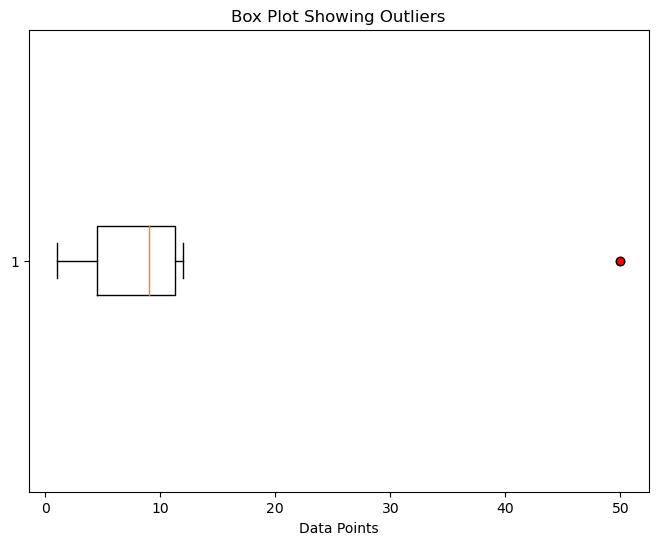

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_iqr_and_outliers(data):
    # Calculate the quartiles
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    return Q1, Q3, IQR, lower_bound, upper_bound, outliers

# Data set
data = [11, 3, 8, 10, 12, 5, 1, 50]

# Calculate IQR and outliers
Q1, Q3, IQR, lower_bound, upper_bound, outliers = calculate_iqr_and_outliers(data)

# Creating a box plot to show the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False)
plt.title("Box Plot Showing Outliers")
plt.xlabel("Data Points")

# Highlighting outliers on the box plot
for outlier in outliers:
    plt.scatter(outlier, 1, color='red')

plt.show()



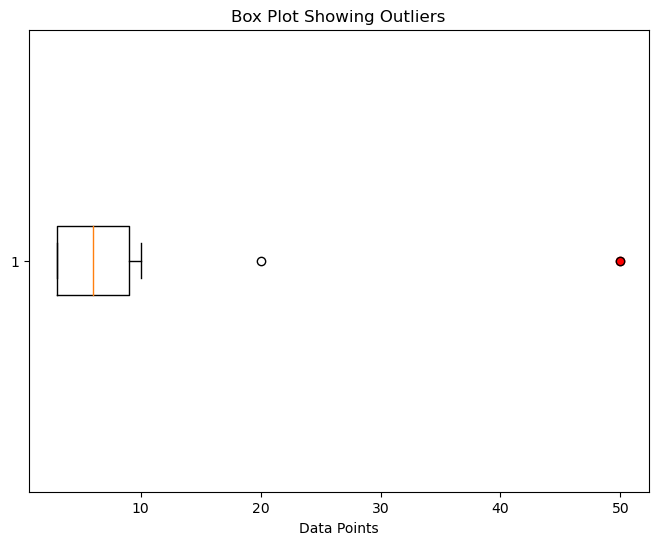

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]

# Calculate mean and standard deviation
mean_data = np.mean(data)
std_data = np.std(data)

# Calculate Z-scores for each data point
z_scores = [(x - mean_data) / std_data for x in data]

# Determine outliers (commonly defined as Z-scores > 3 or < -3)
outliers = [data[i] for i, z in enumerate(z_scores) if z > 3 or z < -3]

# Creating a box plot to show the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False)
plt.title("Box Plot Showing Outliers")
plt.xlabel("Data Points")

# Highlighting outliers on the box plot
for outlier in outliers:
    plt.scatter(outlier, 1, color='red')

plt.show()


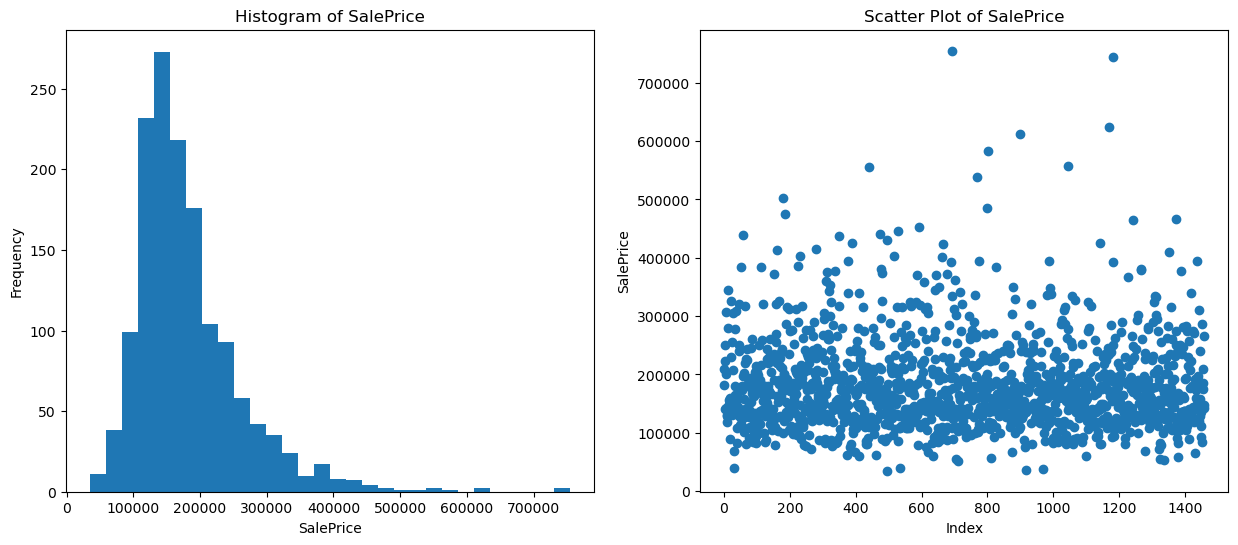

Number of outliers removed with Z-score threshold 2: 63
Number of outliers removed with Z-score threshold 2.5: 40
Number of outliers removed with Z-score threshold 3: 22
Number of outliers removed with Z-score threshold 3.5: 13


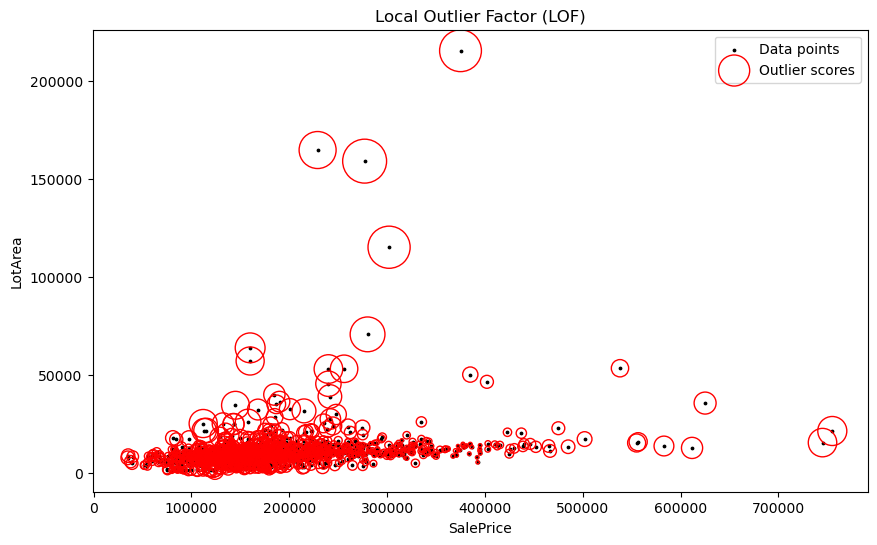

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


file_path = 'Q1_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Step 1: Visualizing data - Histogram and Scatterplot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=30)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(df.index, df['SalePrice'])
plt.title('Scatter Plot of SalePrice')
plt.xlabel('Index')
plt.ylabel('SalePrice')

plt.show()

# Step 2: Identify outliers using Z-score for SalePrice column
mean_saleprice = df['SalePrice'].mean()
std_saleprice = df['SalePrice'].std()

thresholds = [2, 2.5, 3, 3.5]
outlier_counts = {}

for t in thresholds:
    z_score = ((df['SalePrice'] - mean_saleprice) / std_saleprice).abs()
    outliers = z_score > t
    outlier_counts[t] = outliers.sum()

    # Step 3: Print the number of outliers removed
    print(f"Number of outliers removed with Z-score threshold {t}: {outlier_counts[t]}")

# Step 4: LocalOutlierFactor for SalePrice and LotArea columns
clf = LocalOutlierFactor(n_neighbors=20)
X = df[['SalePrice', 'LotArea']]
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(10, 6))
plt.scatter(X['SalePrice'], X['LotArea'], color='k', s=3, label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X['SalePrice'], 
    X['LotArea'], 
    s=1000 * radius, 
    edgecolors='r', 
    facecolors='none', 
    label='Outlier scores'
)
plt.title("Local Outlier Factor (LOF)")
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.legend()
plt.show()


## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

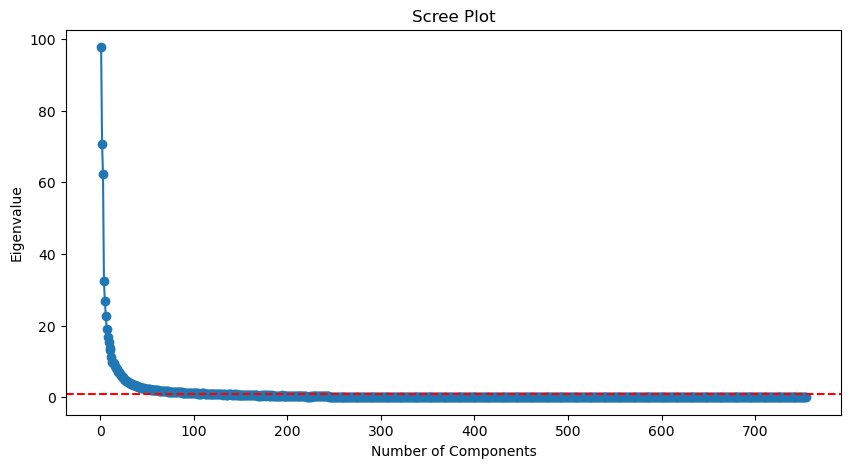

Transformed Data (First 5 Rows):
[[-10.04737199   1.47107634  -6.84640331  -0.78192399  -3.43955143
   -0.05258896]
 [-10.637725     1.58374908  -6.83097622   1.41607058  -3.20016819
    1.72496507]
 [-13.51618517  -1.25354227  -6.81869704   1.41276207  -2.28357553
    2.56755507]
 [ -9.15508368   8.8335994   15.29090311  -4.03625437  -5.13844307
   -9.56965762]
 [ -6.76446985   4.6114661   15.63711993  -5.8478531   -5.79418508
  -11.05078678]]

PCA Components:
[[ 0.00734344 -0.04502657  0.0173696  ... -0.01324704 -0.01942424
  -0.02902069]
 [ 0.00116719  0.04700965  0.01045381 ... -0.00858509 -0.01718094
  -0.03571026]
 [ 0.00651538 -0.00629257 -0.05766351 ... -0.02176371 -0.02271759
  -0.02900893]
 [-0.01492118  0.02421043  0.01222889 ...  0.01327218  0.01791143
   0.02433562]
 [ 0.02300268 -0.01025634  0.00547857 ... -0.03581411 -0.02337009
  -0.01406908]
 [ 0.02108681  0.00936104  0.02363058 ... -0.02337898 -0.02014615
  -0.01866712]]

Explained Variance Ratio:
[0.12945498 0.093776

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Q2_dataset.csv'
df = pd.read_csv(file_path)

# Step 1: Seperate and standardize the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Eigen decomposition and scree plot
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Step 3: Primary Component Selection
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)


# Printing the transformed data (PCA)
print("Transformed Data (First 5 Rows):")
print(X_pca[:5, :])

# Printing PCA components
print("\nPCA Components:")
print(pca.components_)

# Printing the amount of variance explained by each of the selected components
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


# Step 4: Projection in a New Feature Space
# This is achieved by the PCA transformation in the previous step

# Step 5: Principal Component Analysis
# Already done in step 3 with PCA

# Step 6: Compare precision and recall for logistic regression before and after PCA
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# # Logistic regression without PCA
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)
# precision_without_pca = precision_score(y_test, y_pred)
# recall_without_pca = recall_score(y_test, y_pred)

# # Logistic regression with PCA
# log_reg_pca = LogisticRegression()
# log_reg_pca.fit(X_train_pca, y_train_pca)
# y_pred_pca = log_reg_pca.predict(X_test_pca)
# precision_with_pca = precision_score(y_test_pca, y_pred_pca)
# recall_with_pca = recall_score(y_test_pca, y_pred_pca)

# precision_without_pca, recall_without_pca, precision_with_pca, recall_with_pca

# Logistic regression without PCA
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)  # using liblinear solver
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
precision_without_pca = precision_score(y_test, y_pred)
recall_without_pca = recall_score(y_test, y_pred)

# Logistic regression with PCA
log_reg_pca = LogisticRegression(solver='liblinear', max_iter=1000)  # using liblinear solver
log_reg_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = log_reg_pca.predict(X_test_pca)
precision_with_pca = precision_score(y_test_pca, y_pred_pca)
recall_with_pca = recall_score(y_test_pca, y_pred_pca)

print("\nPrecison without PCA: ", precision_without_pca)
print("\nRecall without PCA: ", recall_without_pca)
print("\nPrecison with PCA: ", precision_with_pca)
print("\nRecall with PCA: ", recall_with_pca)



## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

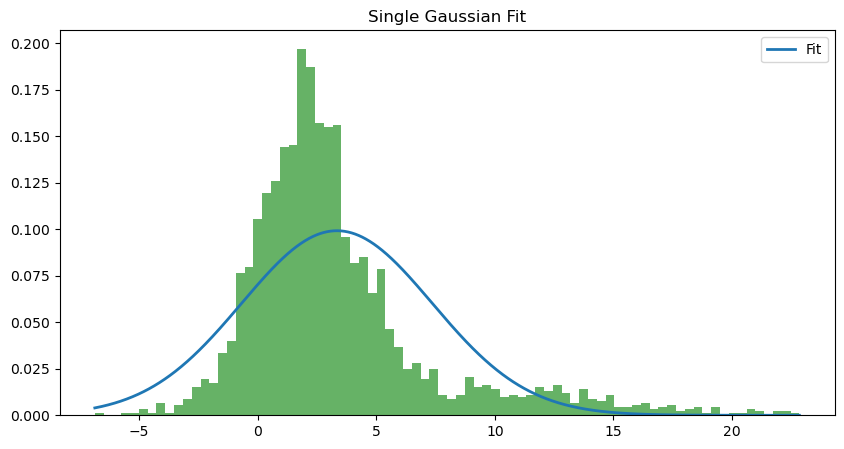

Iteration 0, Log-Likelihood: -116579.98047476204
Iteration 1, Log-Likelihood: -6438.347162584552
Iteration 2, Log-Likelihood: -6431.828808000041
Iteration 3, Log-Likelihood: -6428.834862077346
Iteration 4, Log-Likelihood: -6426.917992364119
Iteration 5, Log-Likelihood: -6425.602003773496
Iteration 6, Log-Likelihood: -6424.65338951769
Iteration 7, Log-Likelihood: -6423.940033599673
Iteration 8, Log-Likelihood: -6423.382967705258
Iteration 9, Log-Likelihood: -6422.932831322638


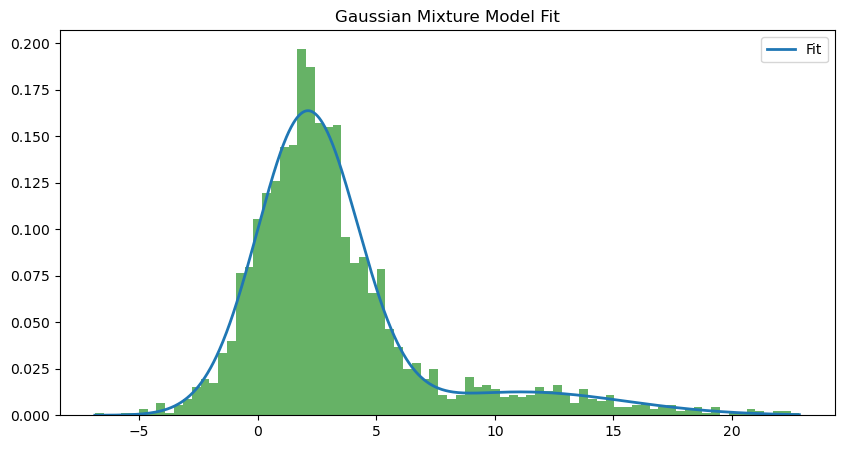

In [33]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        return norm.pdf(datum, self.mu, self.sigma)
# Generate the data
# np.random.seed(random_seed)
# y1 = np.random.normal(Mean1, Standard_dev1, 500)
# y2 = np.random.normal(Mean2, Standard_dev2, 2000)
# data = np.append(y1, y2)

random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

# Fit a single Gaussian
single_gaussian = Gaussian(np.mean(data), np.std(data))

# Plot the result
x_values = np.linspace(min(data), max(data), 1200)
y_values = [single_gaussian.pdf(x) for x in x_values]

plt.figure(figsize=(10, 5))
plt.hist(data, bins=80, density=True, alpha=0.6, color='g')
plt.plot(x_values, y_values, label='Fit', lw=2)
plt.title('Single Gaussian Fit')
plt.legend()
plt.show()

class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"
    
    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(mu_min, sigma_min)
        self.two = Gaussian(mu_max, sigma_max)
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # Calculate probabilities to assign data to Gaussian one and two
        self.loglike = 0. # Total log likelihood
        self.resp1 = self.mix * self.one.pdf(self.data)
        self.resp2 = (1 - self.mix) * self.two.pdf(self.data)
        self.resp = self.resp1 + self.resp2

        # Normalize responsibilities so they sum to 1
        self.resp1 /= self.resp
        self.resp2 /= self.resp
        self.loglike = np.sum(np.log(self.resp))
        self.resp = np.column_stack((self.resp1, self.resp2))

    def Mstep(self):
        "Perform an M(aximization)-step"
        # Update the parameters of the Gaussians
        weight1 = self.resp[:, 0]
        total_weight1 = weight1.sum()
        weight2 = self.resp[:, 1]
        total_weight2 = weight2.sum()

        self.one.mu = np.sum(weight1 * self.data) / total_weight1
        self.two.mu = np.sum(weight2 * self.data) / total_weight2
        self.one.sigma = np.sqrt(np.sum(weight1 * (self.data - self.one.mu)**2) / total_weight1)
        self.two.sigma = np.sqrt(np.sum(weight2 * (self.data - self.two.mu)**2) / total_weight2)
        self.mix = total_weight1 / (total_weight1 + total_weight2)

    def iterate(self, N=10, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(N):
            self.Estep()
            self.Mstep()
            if verbose:
                print(f'Iteration {i}, Log-Likelihood: {self.loglike}')

    def pdf(self, x):
        "Probability density function for mixture"
        return (self.mix * self.one.pdf(x)) + ((1 - self.mix) * self.two.pdf(x))

# Now, let's create a Gaussian Mixture Model instance and iterate
gmm = GaussianMixture_self(data)
gmm.iterate(verbose=True)

# Plot the result
x_values = np.linspace(min(data), max(data), 1200)
y_values = [gmm.pdf(x) for x in x_values]

plt.figure(figsize=(10, 5))
plt.hist(data, bins=80, density=True, alpha=0.6, color='g')
plt.plot(x_values, y_values, label='Fit', lw=2)
plt.title('Gaussian Mixture Model Fit')
plt.legend()
plt.show()
